# Basic Python

## A
Write and run a cell that prints out the first 20 even terms in the Fibonacci sequence, where:

$a_0 = a_1 = 1$

$a_{n+1} = a_n + a_{n-1}$

(Btw, you can put TeX equations in Jupyter cells too by surrounding them with $ symbols. What fun!)

In [1]:
# solution...
ctr = 0

fib = [1, 1]
even = []

while len(even) < 20:
    # compute and store next term
    fib.append(fib[-1] + fib[-2])
    
    # store if even
    if fib[-1] % 2 == 0:
        even.append(fib[-1])
        
print(even)

[2, 8, 34, 144, 610, 2584, 10946, 46368, 196418, 832040, 3524578, 14930352, 63245986, 267914296, 1134903170, 4807526976, 20365011074, 86267571272, 365435296162, 1548008755920]


## B

Write a function that takes a list of 10 numbers as its argument and returns the average of the top 3 values. Make sure to give it a good name, and test it with the following inputs:

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

[1, -1, 2, -2, 3, -3, 4, -4, 5, -5]

In [2]:
# solution...
def mean_top_n(x, n):
    """Return mean of top n vals in x."""
    # get top n values of x
    top_n = sorted(x)[-n:]
    
    # add them up
    total = 0
    
    for x_i in top_n:
        total = total + x_i
        
    # divde by n
    return total/n

In [3]:
x_0 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x_1 = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
x_2 = [1, -1, 2, -2, 3, -3, 4, -4, 5, -5]
n = 3

for x in [x_0, x_1, x_2]:
    print(mean_top_n(x, 3))

8.0
8.0
4.0


## C

Write a function to test if a list is a palindrome (if it's the same forwards and backwards) and test it on the following:

`l_0 = [1, 1, 3, 1, 1]`

`l_1 = [1, 2, 3, 5, 6]`

`l_2 = [1, 2, 3, 2, 1]`

In [3]:
# solution
def is_palindrome(l):
    
    l_reversed = l[::-1]
    
    diff_els_detected = False
    
    for el_0, el_1 in zip(l, l_reversed):
        
        if el_0 != el_1:
            diff_els_detected = True
            break
        
    if diff_els_detected:
        return False
    else:
        return True
    
print(is_palindrome([1, 1, 3, 1, 1]))
print(is_palindrome([1, 2, 3, 5, 6]))
print(is_palindrome([1, 2, 3, 2, 1]))

True
False
True


# Scientific Python

## A
Question 1: what does it mean if you get the following error?
```
NameError: name 'np' is not defined
```

Answer: you forgot to import numpy as np.

## B

Question 2: What does it mean if your plots don't show up, but no error is thrown?

Answer: you forgot to run `%matplotlib inline` in one of your cells.

We'll put in our usual scientific boiler plate for the rest of the exercises.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## C

Create an array of the square roots of the first 5 odd integers.

In [5]:
# solution...
x = np.arange(1, 11, 2) ** 0.5
print(x)

[1.         1.73205081 2.23606798 2.64575131 3.        ]


## D

Create a 7 x 7 array of uniformly distributed random numbers between -5 and 5. Then set all negative values to zero.

In [6]:
# solution...
x = np.random.uniform(-5, 5, (7, 7))
x[x < 0] = 0
print(x)

[[0.         0.         2.02285475 1.97558971 3.30618949 0.
  0.        ]
 [0.34426896 0.42410885 0.         0.         2.10877789 0.
  1.8580639 ]
 [4.26759046 0.         0.         0.         3.97633145 0.
  0.        ]
 [3.50527897 0.28046773 4.93425162 2.70599839 0.79842419 0.
  0.        ]
 [0.0344     2.38977962 0.         2.2098256  1.7125368  0.
  0.        ]
 [0.1155731  4.82732343 0.60041322 0.93031804 0.         0.
  0.        ]
 [0.70422387 0.         3.84837318 0.97045317 0.         1.94455864
  0.        ]]


## Problem 1

The data file noise.npy contains a 1-D time array `t` and a 1-D white noise array `x` of the same length as `t`. The data was saved in the following way:

```
save_data = {'t': t, 'x': x}
np.save('noise.npy', np.array([save_data]))
```

A. Load the data and retrieve `t` and `x` from the file.

B. Plot `x` vs `t` on in a figure and label the axes.

C. How long is `t`? What is the sampling frequency (1/timestep)? (Assume `t` is in seconds.) What are the mean and standard deviation of `x`?

In [7]:
t = np.arange(0, 10, 0.01)
x = np.random.normal(0, 1, len(t))

save_data = {'t': t, 'x': x}
np.save('noise.npy', np.array([save_data]))

t = 9.99 s long
fs =  100.0 Hz
Mean(x) = 0.028088268218205283
Std(x) = 0.9925099677319436


/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


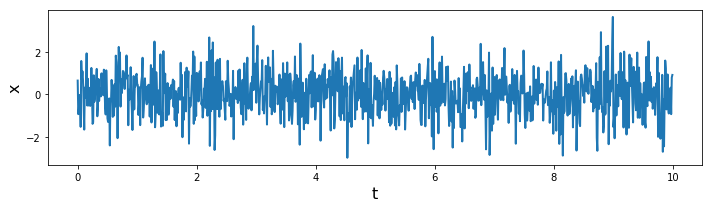

In [8]:
# load data
data = np.load('noise.npy')[0]
t = data['t']
x = data['x']

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 3), tight_layout=True)
ax.plot(t, x, lw=2)
ax.set_xlabel('t', fontsize=16)
ax.set_ylabel('x', fontsize=16)

print('t =', t[-1] - t[0], 's long')

# calculate average sampling frequency
dt = np.mean(t[1:None] - t[None:-1])
print('fs = ', 1/dt, 'Hz')

print('Mean(x) =', np.mean(x))
print('Std(x) =', np.std(x))

D. Write a function called `smooth_ma` that takes in `t`, `x` and a time window `t_wdw` and returns a version of `x`, called `x_ma`, smoothed with a moving average (ma). E.g. if `t_wdw = 0.1` (100 ms), the value of `x_ma` at `t = 2.3` would be an average of all `x` between `t = 2.25` and `t = 2.35`. For `t < t_wdw/2`, just take the average of the values of `x` with `t >=0`. Likewise when `t > t.max() - t_wdw/2`.

E. Using `smooth_ma`, create versions of `x` smoothed with the following time windows: 50 ms, 100 ms, 500 ms, 1 s.

F. Create a new figure with the original `x` and all smoothed versions overlaid in different colors.

In [9]:
# define smoothing function
def smooth_ma(x, t, t_wdw):
    """Compute moving average of x over specifc window t_wdw.
    
    :param t: time vector (1-D array)
    :param x: x vector
    :param t_wdw: time window for avg'ing, e.g. (-.5, .5)
    """
    
    x_ma = np.nan * np.zeros(len(x))
    
    for t_ctr, t_ in enumerate(t):
        # get start of window
        start = np.max([t[0], t_ + t_wdw[0]])
        # get end of window
        end = np.min([t[-1], t_ + t_wdw[1]])
        
        # get mask over window
        t_mask = (start <= t) & (t < end)
        
        # calc mean of x in window
        x_mean = np.mean(x[t_mask])
        # store result
        x_ma[t_ctr] = x_mean
        
    return x_ma

/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


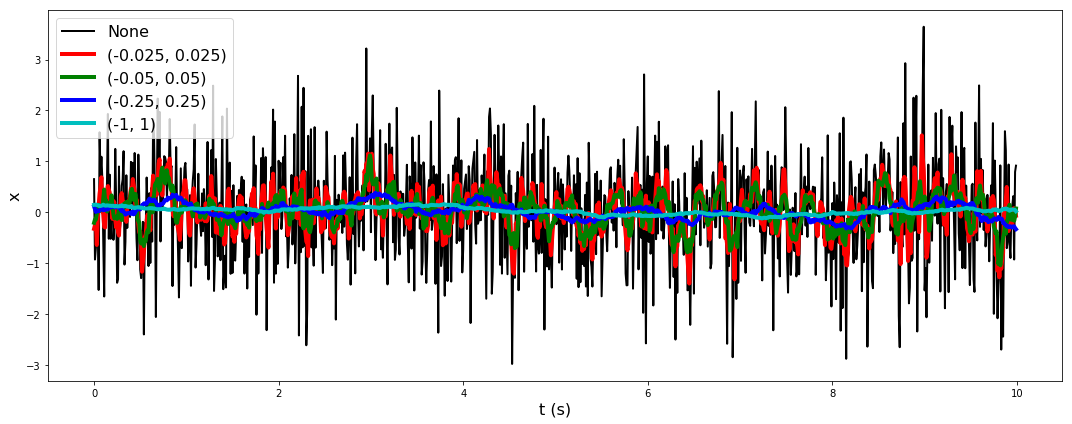

In [10]:
# define time windows to loop over
T_WDWS = [(-.025, .025), (-.05, .05), (-.25, .25), (-1, 1)]

# loop over time windows
x_mas = []

for t_wdw in T_WDWS:
    x_ma = smooth_ma(x, t, t_wdw)
    x_mas.append(x_ma)
    
# plot results
fig, ax = plt.subplots(1, 1, figsize=(15, 6), tight_layout=True)

# plot original
ax.plot(t, x, c='k', lw=2, zorder=0)

cs = ['r', 'g', 'b', 'c']

for x_ma, c in zip(x_mas, cs):
    ax.plot(t, x_ma, c=c, lw=4)
    
ax.set_xlabel('t (s)', fontsize=16)
ax.set_ylabel('x', fontsize=16)

ax.legend(['None'] + T_WDWS, fontsize=16)

### Bonus problem
Do the same loading the data from the csv file `noise.csv`.

## Problem 2

Let's do some real neuroscience now. Consider a leaky integrate-and-fire neuron that takes in a time-varying input:

$\tau\cfrac{dv}{dt} = -(v - v_{rest}) + I(t)R$

$v > v_{th} \implies v \rightarrow v_{rest}$


Using the simulation section in [2_scientific_python](2_scientific_python.ipynb) as a guide, do the following:

A. Write a function that takes in: (1) an numerical integration timestep `dt`, (2) `i`, a time-varying current input, (3) a dict of other params `{'V_REST': -0.068, 'TAU': 0.03, 'V_TH': -0.04, 'R': 20e6}`; and returns (1) a 1-D time array `t`, a 1-D voltage array `v`, and a 1-D array of spike times `spks`. Assume $v(t=0) = v_{rest}$.

In [11]:
# define LIF response function
def run_lif_smln(dt, i, params):
    """Simulate leaky integrate-and-fire neuron response to input current."""
    ts = np.arange(0, len(i)) * dt  # simulate for 2 seconds

    vs = np.nan * np.zeros(len(ts))  # initialize voltage array

    vs[0] = params['V_REST']  # start at V_REST
    spks = []  # list of spike times

    # run smln
    for t_ctr, t in enumerate(ts):

        # break if we're at the end
        if t_ctr == len(ts) - 1:
            break

        # update voltage
        v_n = vs[t_ctr]
        ir = params['R'] * i[t_ctr]
        vs[t_ctr+1] = v_n + (dt/params['TAU']) * (-(v_n - params['V_REST']) + ir)

        # check for spike
        if vs[t_ctr+1] > params['V_TH']:
            # reset v
            vs[t_ctr+1] = params['V_REST']
            # note time of spike
            spks.append(t)
            
    return ts, vs, np.array(spks)

B. Test your function by driving a simulated neuron with a constant `I(t) = 1.5 nA` for 1 second, with `dt = 0.001` (1 ms). Plot the resulting voltages and spikes. Label the axes, add a legend indicating the voltage and spikes, and put the time-averaged firing rate in the axis title.

Text(0,0.5,'Vm (V)')

/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


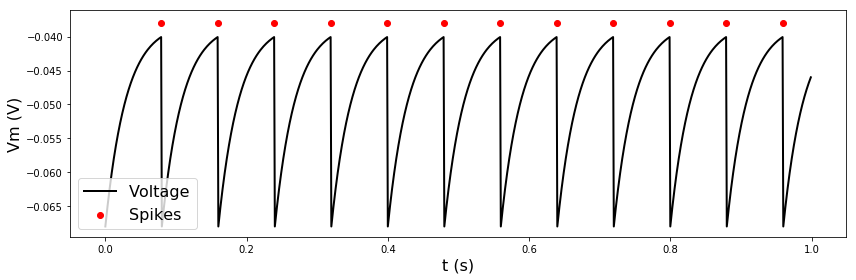

In [12]:
# drive neuron with constant current input
dt = .001
dur = 1
i = 1.5e-9 * np.ones(int(dur/dt))
params = {'V_REST': -0.068, 'TAU': 0.03, 'V_TH': -0.04, 'R': 20e6}

ts, vs, spks = run_lif_smln(dt, i, params)

# calc avg firing rate
fr = np.sum(spks) / dur

# make plot
fig, ax = plt.subplots(1, 1, figsize=(12, 4), tight_layout=True)
ax.plot(ts, vs, c='k', lw=2)
y_spk = -.038
ax.scatter(spks, y_spk*np.ones(len(spks)), c='r')
ax.legend(['Voltage', 'Spikes'], fontsize=16)
ax.set_xlabel('t (s)', fontsize=16)
ax.set_ylabel('Vm (V)', fontsize=16)

C. Use your function to drive a simulated neuron with a "white-noise" `I(t)` of 1 second duration, i.e. where each element of `I` is a Gaussian distributed random variable with mean 0 and STD `10 nA`. Make a (2 x 1) axis array where the top axis shows `I(t)` and the bottom axis shows the voltage and spike responses. Label all axes and put the time-averaged firing rate in the title of the bottom axis showing the voltage/spikes.

Text(0,0.5,'Vm (V)')

/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


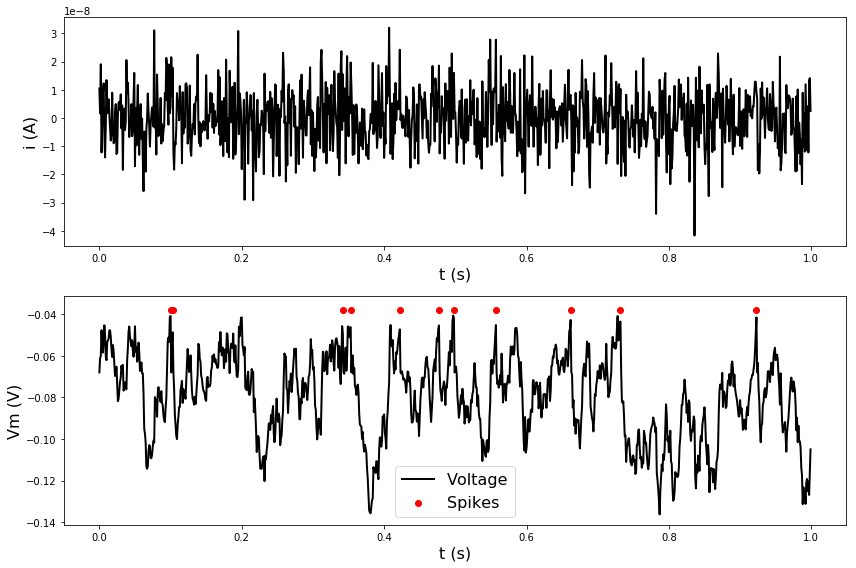

In [13]:
# drive neuron with white noise current input
i_wn = np.random.normal(0, 10e-9, len(i))
ts, vs_wn, spks_wn = run_lif_smln(dt, i_wn, params)

# calc avg firing rate
fr = np.sum(spks_wn) / dur

# make plot
fig, axs = plt.subplots(2, 1, figsize=(12, 8), tight_layout=True)
axs[0].plot(ts, i_wn, c='k', lw=2)
axs[0].set_xlabel('t (s)', fontsize=16)
axs[0].set_ylabel('i (A)', fontsize=16)

axs[1].plot(ts, vs_wn, c='k', lw=2)
y_spk = -0.038
axs[1].scatter(spks_wn, y_spk*np.ones(len(spks_wn)), c='r')
axs[1].legend(['Voltage', 'Spikes'], fontsize=16)
axs[1].set_xlabel('t (s)', fontsize=16)
axs[1].set_ylabel('Vm (V)', fontsize=16)

D. Loop over 50 evenly spaced STDs of `I(t)`, from 1 to 50 nA, with mean 0. Make a plot showing time-averaged firing rate vs. the STD of `I(t)`. Repeat for two other values of `TAU` of your choosing, as well as the original TAU = 30 ms, and plot them on the same plot with different colors.

Text(0.5,1,'Mean FR vs current STD')

/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


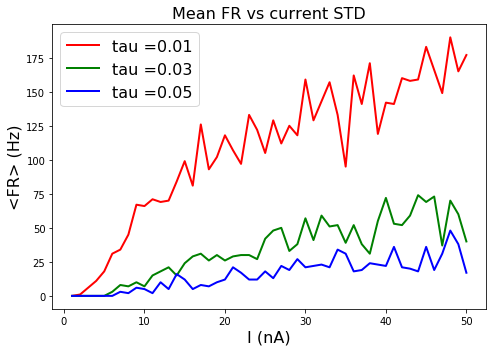

In [14]:
# define TAUs
TAUS = [0.01, 0.03, 0.05]

# define current input STDs
I_STDS = np.linspace(1e-9, 50e-9, 50)

# make data structure for storing results
fr_means = np.nan * np.zeros((len(TAUS), len(I_STDS)))

# loop over TAUs
for tau_ctr, tau in enumerate(TAUS):
    # set TAU
    params['TAU'] = tau
    
    # loop over current input stds
    for i_ctr, i_std in enumerate(I_STDS):
    
        # make current input
        i_wn = np.random.normal(0, i_std, int(dur/dt))
        
        # drive neuron with current input
        ts, vs_wn, spks_wn = run_lif_smln(dt, i_wn, params)
        
        # calc avg firing rate
        fr_mean = len(spks_wn)
        
        # store avg firing rate
        fr_means[tau_ctr, i_ctr] = fr_mean
        
# plot firing rate vs current input STD
fig, ax = plt.subplots(1, 1, figsize=(7, 5), tight_layout=True)

colors = ['r', 'g', 'b']

for tau_ctr, tau in enumerate(TAUS):
    color = colors[tau_ctr]
    fr_means_ = fr_means[tau_ctr]
    
    ax.plot(1e9 * I_STDS, fr_means_, color=color, lw=2)
    
ax.set_xlabel('I (nA)', fontsize=16)
ax.set_ylabel('<FR> (Hz)', fontsize=16)

legend = []

for tau in TAUS:
    legend.append('tau =' + str(tau))
    
ax.legend(legend, fontsize=16)
ax.set_title('Mean FR vs current STD', fontsize=16)

### Bonus problem
Plot the inter-spike interval distribution (the distribution of times between spikes) for I_STD = 25 nA and two different TAUs.